<a href="https://colab.research.google.com/github/nhduy-bbean/Eiu-Data-Challenge/blob/main/EIU_datachallenge_dataset_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset 03: NYC Traffic Accident Pattern Analysis**  

*THE HIDDEN STORY BEHIND NEW YORK'S STREETS*

In [1]:
# Import libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# Read the data file
df = pd.read_csv("https://media.githubusercontent.com/media/nhduy-bbean/Eiu-data-challenge/refs/heads/main/NYC_Collisions.csv")

## **Data Cleaning**

In [3]:
# Show the first 5 rows
df.head()

,Collision ID,Date,Time,Borough,Street Name,Cross Street,Latitude,Longitude,Contributing Factor,Vehicle Type,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed
0,4491746,1/1/2021,20:00:00,Bronx,Bruckner Expressway,NaN,40.83398,-73.826350,Pavement Slippery,Passenger Vehicle,0.0,0,0,0,0,0,0,0
1,4441905,1/1/2021,5:28:00,Brooklyn,Lafayette Avenue,NaN,40.68730,-73.973656,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0
2,4382769,1/1/2021,6:00:00,Staten Island,West Shore Expressway,NaN,NaN,NaN,Fell Asleep,Passenger Vehicle,0.0,0,0,0,0,0,0,0
3,4380949,1/1/2021,19:30:00,Bronx,Sedgwick Avenue,Vancortlandt Avenue West,40.88270,-73.892730,NaN,Not Reported,0.0,0,0,0,0,0,0,0
4,4380940,1/1/2021,7:40:00,Brooklyn,Cortelyou Road,Mc Donald Avenue,40.63791,-73.978640,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0


In [4]:
# The number of rows and columns
df.shape

(238421, 18)

### **1. Data Types**

In [5]:
# Check column types
df.dtypes

,0
Collision ID,int64
Date,object
Time,object
Borough,object
Street Name,object
Cross Street,object
Latitude,float64
Longitude,float64
Contributing Factor,object
Vehicle Type,object


In [6]:
# Convert data types
df['Date'] = pd.to_datetime(df['Date'])
# Get the hour from the Time column by splitting the string (to avoid datetime formatting errors).
df['Hour'] = df['Time'].str.split(':').str[0].astype(int)
# Get the name of the day of the week
df['Dayofweek'] = df['Date'].dt.day_name()

### **2. Missing Values**

In [7]:
# Check missing values
df.isnull().sum()

,0
Collision ID,0
Date,0
Time,0
Borough,7197
Street Name,363
Cross Street,127130
Latitude,22323
Longitude,22323
Contributing Factor,1287
Vehicle Type,0


In [8]:
# Remove all rows with missing values except the Cross Street column
df.dropna(subset=["Borough","Street Name","Latitude","Longitude","Contributing Factor","Persons Injured"], inplace=True)

Initial dataset contained **over 200,000 records**.

Rows with missing values were removed **except for missing values in the Cross Street column**, because this column contains a very large number of missing entries:

- Imputing values could introduce **bias**, as filled data may not reflect real street information.

- Removing all rows with missing *Cross Street* values would cause a **significant loss of data**.

--> Therefore, missing values in *Cross Street* were retained, while other missing values were removed.


### **3. Duplicate Rows**

In [9]:
# Check duplicated rows
print(df.duplicated().sum())
# No duplicate rows in the dataset

0


### ***Insight 1:***  **Nhịp độ giao thông:** Khi nào thành phố nguy hiểm nhất? (Ngày thường và Cuối tuần) (Tháng)

In [10]:
# Phân nhóm Ngày trong tuần (T2-T6) vs Cuối tuần (T7-CN)
def categorize_day(day):
    if day in ['Saturday', 'Sunday']:
        return 'Cuối tuần (T7-CN)'
    return 'Ngày trong tuần (T2-T6)'

df['DayType'] = df['Dayofweek'].apply(categorize_day)

# Tính toán số vụ tai nạn theo Giờ và Nhóm Ngày
df['Date'] = pd.to_datetime(df['Date'])
daily_hourly = df.groupby([df['Date'].dt.date, 'Hour', 'DayType']).size().reset_index(name='Count')
# Sau đó tính trung bình
hourly_trend = daily_hourly.groupby(['Hour', 'DayType'])['Count'].mean().reset_index(name='Accident_Count')

# Vẽ biểu đồ Line chuẩn Cyberpunk
fig = px.line(
    hourly_trend,
    x='Hour',
    y='Accident_Count',
    color='DayType',
    title='<b>NHỊP ĐỘ TAI NẠN: NGÀY ĐI LÀM VS. CUỐI TUẦN</b>',
    labels={'Hour': 'Khung giờ (24h)', 'Accident_Count': 'Trung bình số vụ tai nạn mỗi ngày', 'DayType': 'Loại ngày'},
    template='plotly_dark',
    color_discrete_map={
        'Ngày trong tuần (T2-T6)': '#00E5FF', # Xanh Neon
        'Cuối tuần (T7-CN)': '#FF3131'      # Đỏ Neon
    },
    line_shape="spline" # Làm đường cong mềm mại hơn
)

# Tinh chỉnh giao diện
fig.update_traces(line=dict(width=4)) # Làm đường kẻ dày hơn cho dễ nhìn trên TikTok
fig.update_layout(
    font=dict(family="Arial", size=14),
    hovermode="x unified",
    paper_bgcolor="#0a0a0a", # Đen than chì
    plot_bgcolor="#0a0a0a",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

# Thêm vùng đánh dấu giờ cao điểm
fig.add_vrect(x0=16, x1=19, fillcolor="red", opacity=0.2, layer="below", line_width=0,
              annotation_text="CAO ĐIỂM TAN TẦM", annotation_position="top left")

fig.show()

In [11]:
# Tạo cột Tháng (số) và Tên tháng
df['Month'] = df['Date'].dt.month
df['MonthName'] = df['Date'].dt.month_name()

# Đếm số vụ tai nạn theo tháng
monthly_accidents = (
    df.groupby(['Month', 'MonthName'])
      .size()
      .reset_index(name='Accident_Count')
      .sort_values('Month')  # Đảm bảo đúng thứ tự tháng
)

# Vẽ biểu đồ
fig = px.line(
    monthly_accidents,
    x='MonthName',
    y='Accident_Count',
    title='<b>NHỊP ĐỘ TAI NẠN THEO THÁNG TRONG NĂM</b>',
    labels={'MonthName': 'Tháng', 'Accident_Count': 'Số vụ tai nạn'},
    template='plotly_dark',
    line_shape="spline"
)

fig.update_traces(line=dict(width=4, color='#00E5FF'))

fig.update_layout(
    font=dict(family="Arial", size=14),
    paper_bgcolor="#0a0a0a",
    plot_bgcolor="#0a0a0a",
    title_x=0.5
)

fig.show()

### ***Insight 2:***  **Bản đồ "Né gấp":** Nơi bước ra là phải "bật chế độ"' phòng thủ.



In [12]:
# Đếm số vụ theo Borough
borough_counts = (
    df.groupby('Borough')
      .size()
      .reset_index(name='Accident_Count')
      .sort_values('Accident_Count', ascending=False)
)

fig = px.bar(
    borough_counts,
    x='Borough',
    y='Accident_Count',
    title='<b>TAI NẠN THEO BOROUGH (KHU VỰC)</b>',
    labels={'Borough': 'Borough', 'Accident_Count': 'Số vụ tai nạn'},
    template='plotly_dark',
    color='Accident_Count',
    color_continuous_scale='Turbo'
)

fig.update_layout(
    font=dict(family="Arial", size=14),
    paper_bgcolor="#0a0a0a",
    plot_bgcolor="#0a0a0a",
    title_x=0.5
)

fig.show()

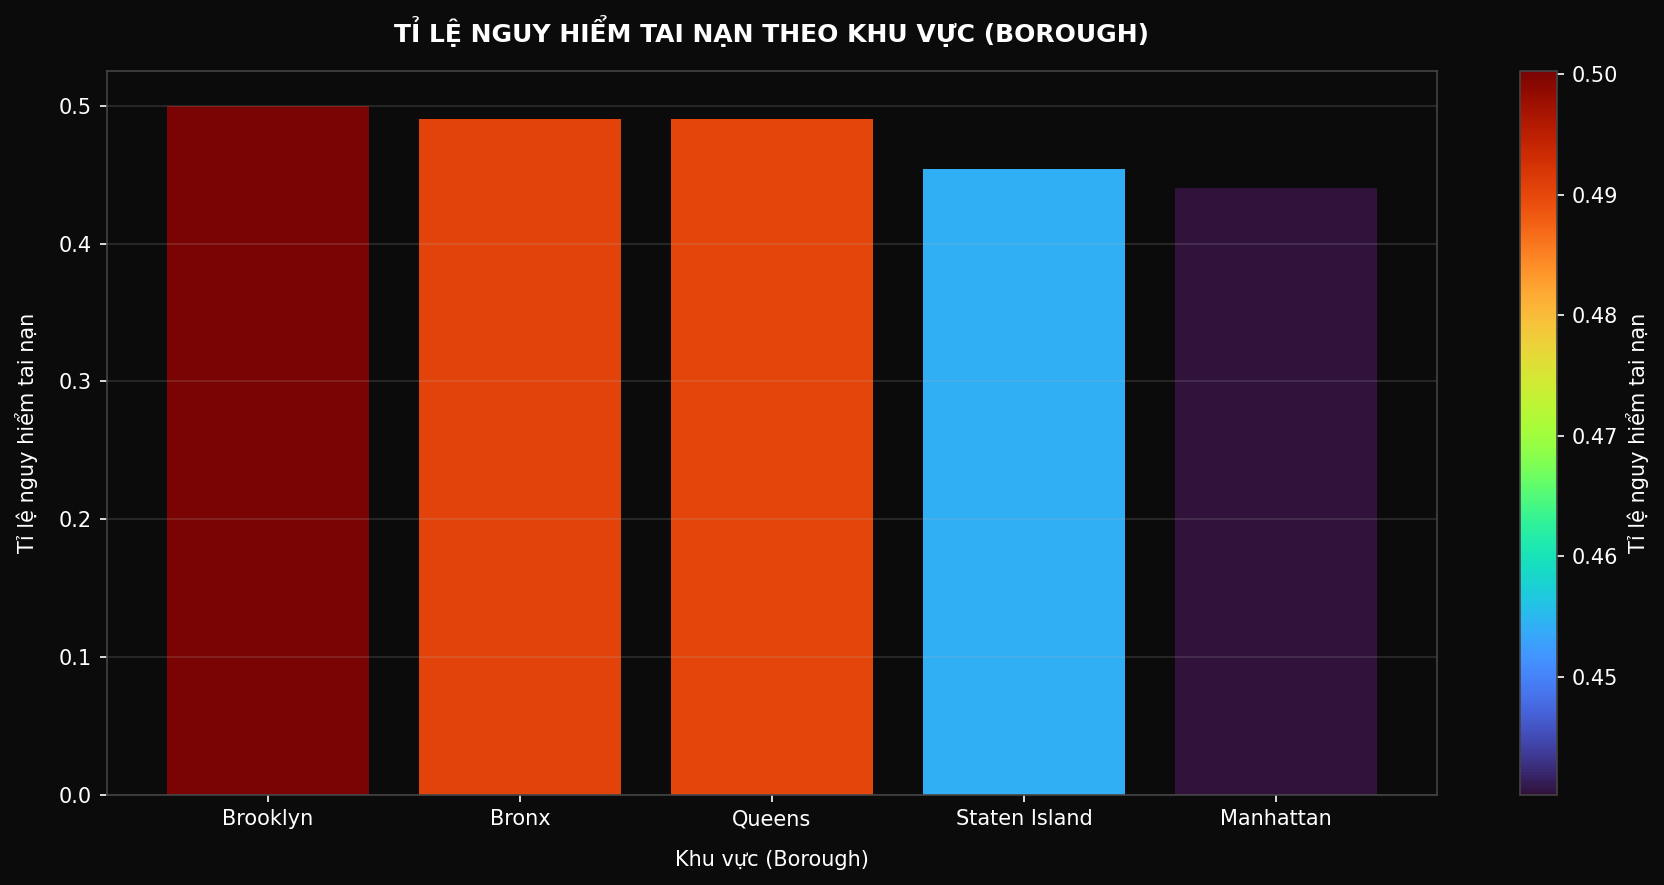

In [13]:
# Combine 'Date' and 'Time' columns into a single 'DateTime' column
df['DateTime'] = pd.to_datetime(df['Date'].dt.strftime('%Y-%m-%d') + ' ' + df['Time'], errors='coerce')

# Drop original 'Date' and 'Time' columns
df = df.drop(columns=['Date', 'Time'])

# Drop 'Cross Street' column due to high number of missing values
df = df.drop(columns=['Cross Street'])

# Drop rows where 'Latitude' or 'Longitude' are missing
df.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# Fill missing 'Borough' values with 'Unknown'
df['Borough'] = df['Borough'].fillna('Unknown')

# Fill missing 'Contributing Factor' values with 'Unknown'
df['Contributing Factor'] = df['Contributing Factor'].fillna('Unknown')

# Drop the single row with a missing 'Persons Injured' value
df.dropna(subset=['Persons Injured'], inplace=True)

g = (df.dropna(subset=["Borough"])
       .groupby("Borough", as_index=False)
       .agg(collisions=("Collision ID","count"),
            injured=("Persons Injured","sum"),
            killed=("Persons Killed","sum")))

g["risk_index"] = (g["injured"] + g["killed"]) / g["collisions"]

order = ["Brooklyn", "Bronx", "Queens", "Staten Island", "Manhattan"]
g["Borough"] = pd.Categorical(g["Borough"], categories=order, ordered=True)
g = g.sort_values("Borough")

# --- Use calculated risk_index for coloring ---
color_values = g.set_index("Borough")["risk_index"].to_dict()

# Determine min and max for normalization based on actual risk_index values
min_risk = g["risk_index"].min()
max_risk = g["risk_index"].max()

cmap = mpl.colormaps["turbo"]
norm = mpl.colors.Normalize(vmin=min_risk, vmax=max_risk)

colors = [cmap(norm(color_values[b])) for b in g["Borough"].astype(str)]

fig, ax = plt.subplots(figsize=(12,6), dpi=150)
fig.patch.set_facecolor("#0b0b0b")
ax.set_facecolor("#0b0b0b")

ax.bar(g["Borough"].astype(str), g["risk_index"], color=colors)

ax.set_title("TỈ LỆ NGUY HIỂM TAI NẠN THEO KHU VỰC (BOROUGH)",
             color="white", fontweight="bold", pad=14)
ax.set_xlabel("Khu vực (Borough)", color="white", labelpad=10)
ax.set_ylabel("Tỉ lệ nguy hiểm tai nạn", color="white", labelpad=10)

ax.grid(axis="y", alpha=0.2)
ax.tick_params(colors="white")
for s in ax.spines.values():
    s.set_color("#444444")

sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Tỉ lệ nguy hiểm tai nạn", color="white")
cbar.ax.tick_params(colors="white")
cbar.outline.set_edgecolor("#444444")

plt.tight_layout()
plt.show()

In [14]:
street_counts = (
    df.groupby('Street Name')
      .size()
      .reset_index(name='Accident_Count')
      .sort_values('Accident_Count', ascending=False)
      .head(10)
)

fig = px.bar(
    street_counts,
    x='Accident_Count',
    y='Street Name',
    orientation='h',
    title='<b>TOP 10 CON ĐƯỜNG NGUY HIỂM NHẤT (NHIỀU TAI NẠN NHẤT)</b>',
    labels={'Street Name': 'Tên đường', 'Accident_Count': 'Số vụ tai nạn'},
    template='plotly_dark',
    color='Accident_Count',
    color_continuous_scale='Turbo'
)

fig.update_layout(
    font=dict(family="Arial", size=14),
    paper_bgcolor="#0a0a0a",
    plot_bgcolor="#0a0a0a",
    title_x=0.5,
    yaxis=dict(autorange="reversed")  # Đường nhiều tai nạn nhất ở trên cùng
)

fig.show()

### ***Insight 3:***  **Đâu là "sát thủ" thực sự trên đường phố New York?**

In [15]:
factor_counts = (
    df['Contributing Factor']
    .value_counts()
    .reset_index()
)

factor_counts.columns = ['Contributing Factor', 'Accident_Count']

top_factors = factor_counts.head(10)

# Bỏ các dòng có Contributing Factor = 'Unspecified'
top_factors = top_factors[top_factors['Contributing Factor'] != 'Unspecified']

fig = px.bar(
    top_factors,
    x='Accident_Count',
    y='Contributing Factor',
    orientation='h',
    title='<b>TOP 10 NGUYÊN NHÂN GÂY TAI NẠN PHỔ BIẾN NHẤT</b>',
    labels={'Contributing Factor': 'Nguyên nhân', 'Accident_Count': 'Số vụ tai nạn'},
    template='plotly_dark',
    color='Accident_Count',
    color_continuous_scale='Turbo'
)

fig.update_layout(
    font=dict(family="Arial", size=14),
    paper_bgcolor="#0a0a0a",
    plot_bgcolor="#0a0a0a",
    title_x=0.5,
    yaxis=dict(autorange="reversed")
)

fig.show()

In [16]:
# Tách 2 nhóm
fatal_df = df[df['Persons Killed'] > 0]
nonfatal_df = df[df['Persons Killed'] == 0]

# Đếm top 10 nguyên nhân mỗi nhóm
fatal_factors = (
    fatal_df['Contributing Factor']
    .value_counts()
    .head(10)
    .reset_index()
)
fatal_factors.columns = ['Contributing Factor', 'Count']
fatal_factors['Type'] = 'Tai nạn chết người'

nonfatal_factors = (
    nonfatal_df['Contributing Factor']
    .value_counts()
    .head(10)
    .reset_index()
)
nonfatal_factors.columns = ['Contributing Factor', 'Count']
nonfatal_factors['Type'] = 'Tai nạn thường'

# Gộp lại thành 1 bảng
compare_factors = pd.concat([nonfatal_factors, fatal_factors], ignore_index=True)

In [17]:
# Bỏ các dòng có Contributing Factor = 'Unspecified'
compare_factors = compare_factors[compare_factors['Contributing Factor'] != 'Unspecified']
fig = px.bar(
    compare_factors,
    x='Count',
    y='Contributing Factor',
    color='Type',
    orientation='h',
    barmode='group',  # <-- Cột đứng cạnh nhau để so sánh
    title='<b>TAI NẠN THƯỜNG VS TAI NẠN CHẾT NGƯỜI</b>',
    labels={
        'Contributing Factor': 'Nguyên nhân',
        'Count': 'Số vụ',
        'Type': 'Loại tai nạn'
    },
    template='plotly_dark'
)

fig.update_layout(
    font=dict(family="Arial", size=14),
    paper_bgcolor="#0a0a0a",
    plot_bgcolor="#0a0a0a",
    title_x=0.5,
    yaxis=dict(autorange="reversed")
)

fig.show()